In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
from IPython.display import display, Image, SVG, Math, YouTubeVideo

#https://www.kaggle.com/camnugent/california-housing-prices

# The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required

In [2]:
#https://www.kaggle.com/camnugent/california-housing-prices
dffull = pd.read_csv (r'/content/sample_data/california_housing_train.csv')

#ตรวจสอบข้อมูล

In [3]:
dffull

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [4]:
dffull.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
dffull.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [6]:
dffull.tail(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


#สำรวจข้อมูลเบื้องต้น

#.describe()

In [7]:
dffull.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [8]:
dffull.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#Pearson Correlation
การหาความสัมพันธ์ระหว่างตัวแปร 2 ตัวที่อยู่ในมาตราการวัดระดับ Interval หรือ Ratio Scale ค่าที่ได้เรียกว่า "สัมประสิทธิ์สหสัมพันธ์" โดยปกติจะมีค่าอยู่ระหว่าง -1.00 ถึง 1.00
- ถ้ามีค่าติดลบหมายความว่า ตัวแปร 2 ตัวมีความสัมพันธ์ในทิศทางตรงกันข้าม
- ถ้ามีค่าเป็นบวกหมายความว่า ตัวแปร 2 ตัวมีความสัมพันธ์ในทิศทางเดียวกัน
- ถ้ามีค่าเป็น 0 หมายความว่าตัวแปร 2 ตัวไม่มีความสัมพันธ์กัน

#.corr()

In [9]:
dffull.corr(method='pearson')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


#Heatmap

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


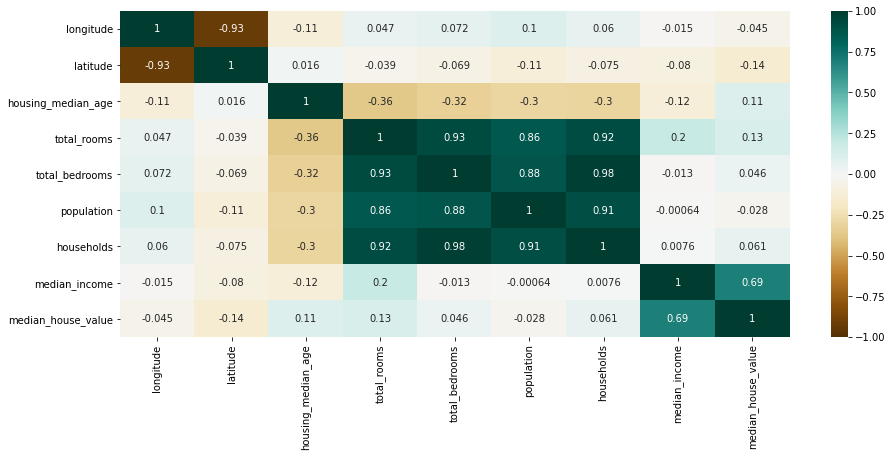

In [11]:
plt.figure(figsize=(15, 6))
sns.heatmap(dffull.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG');

# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.

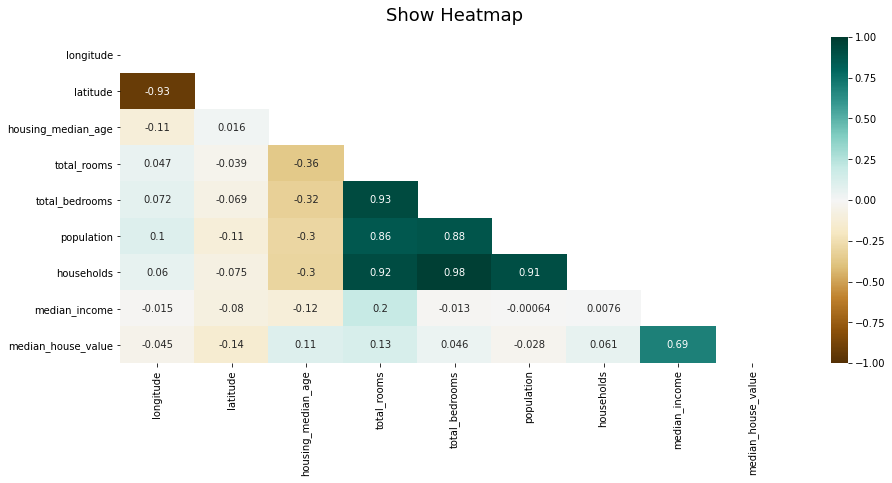

In [12]:
plt.figure(figsize=(15, 6))

mask = np.triu(np.ones_like(dffull.corr(), dtype=np.bool))
heatmap = sns.heatmap(dffull.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG');

heatmap.set_title('Show Heatmap', fontdict={'fontsize':18}, pad=16);

In [13]:
from matplotlib import style

style.use('seaborn-whitegrid')

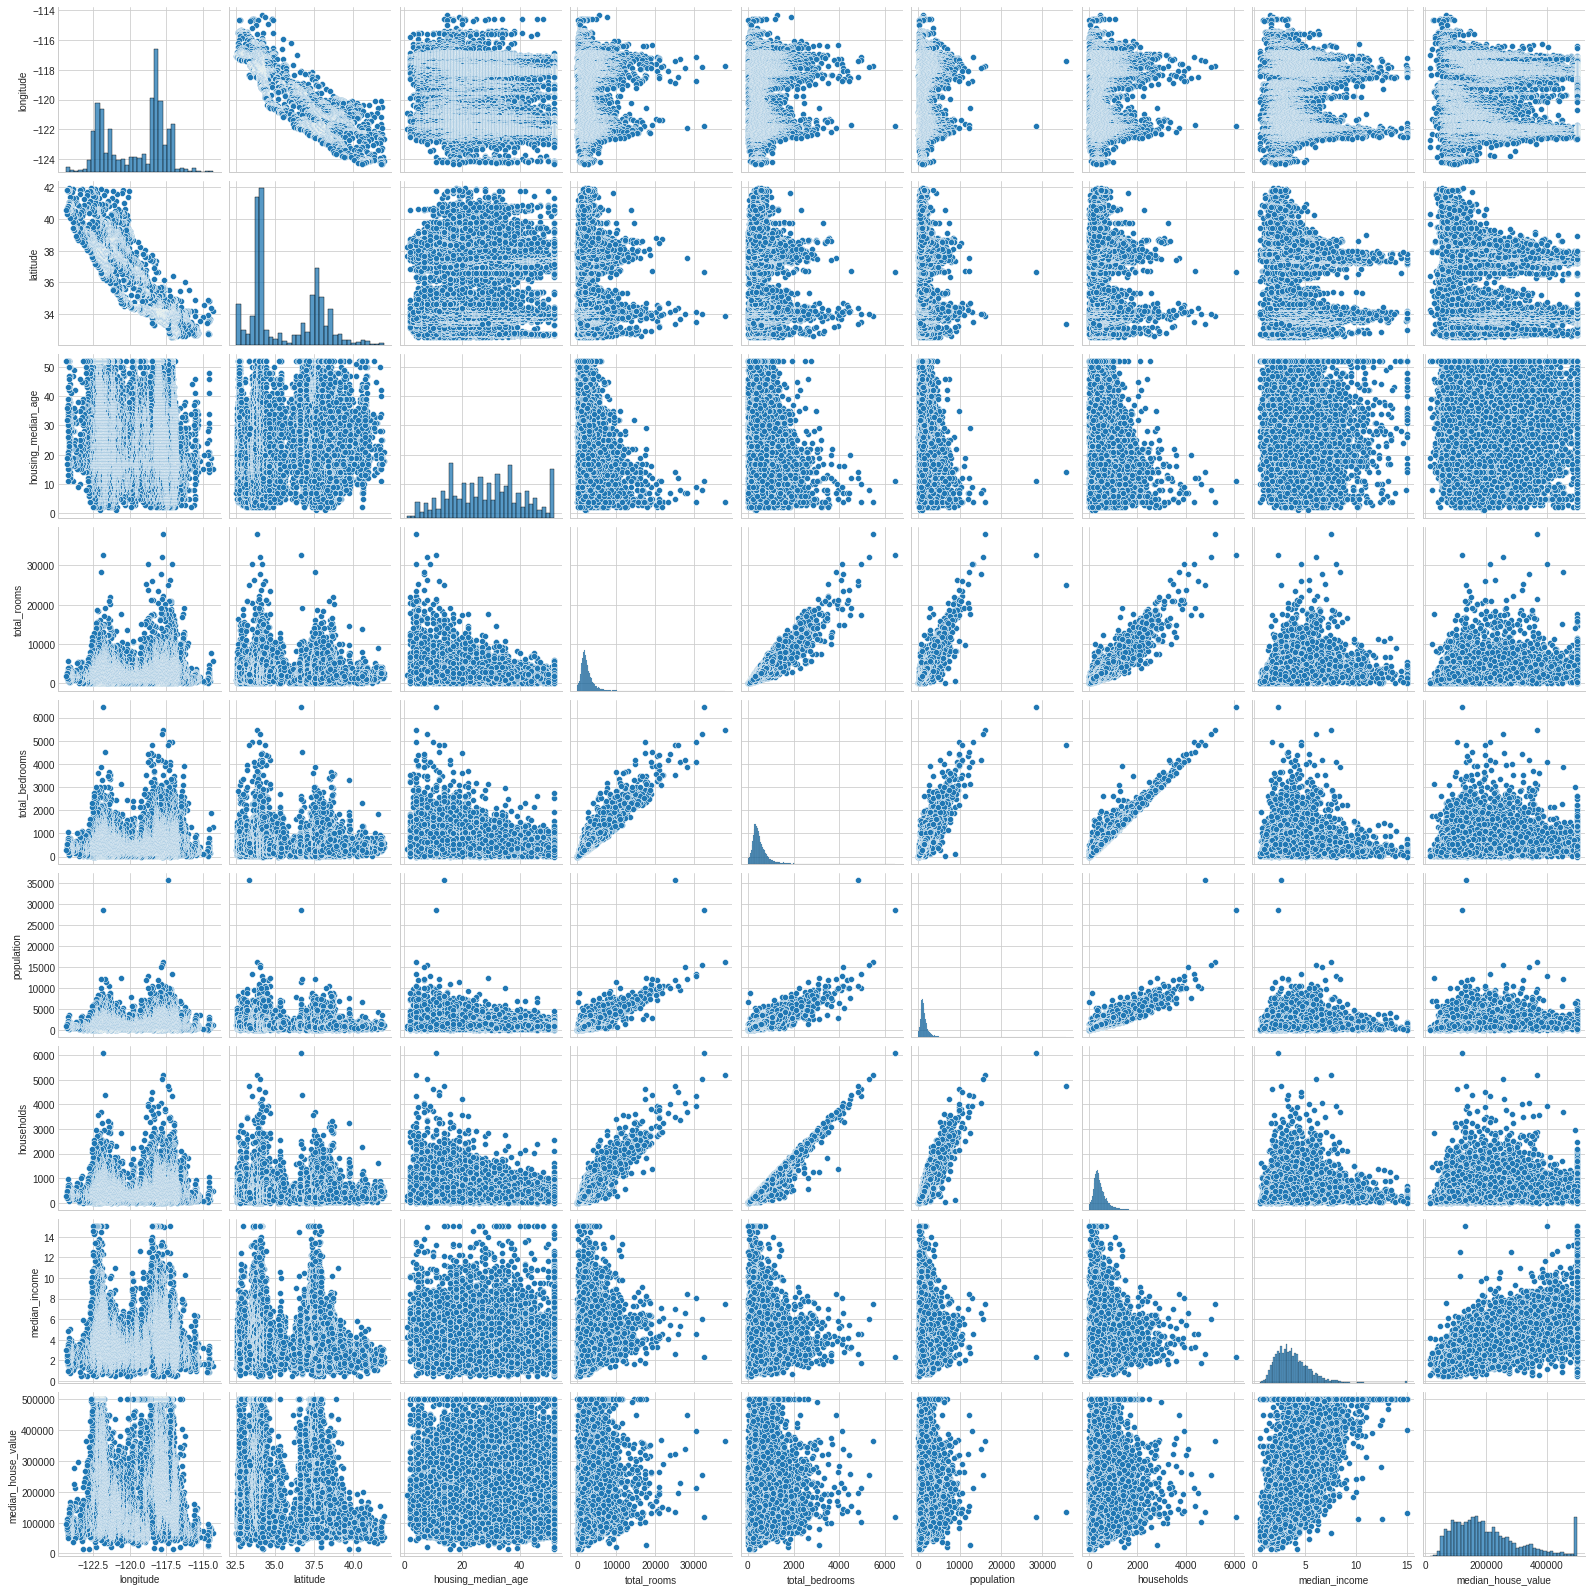

In [14]:
plt.rcParams['figure.figsize'] = (15,10)
sns.pairplot(dffull)

#ความสัมพันธ์ที่ชัดเจน ระหว่าง households vs total_bedrooms



In [15]:
dffull.loc[10:15]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10,-114.60,33.62,16.0,3741.0,801.0,2434.0,824.0,2.6797,86500.0
11,-114.60,33.60,21.0,1988.0,483.0,1182.0,437.0,1.6250,62000.0
12,-114.61,34.84,48.0,1291.0,248.0,580.0,211.0,2.1571,48600.0
13,-114.61,34.83,31.0,2478.0,464.0,1346.0,479.0,3.2120,70400.0
14,-114.63,32.76,15.0,1448.0,378.0,949.0,300.0,0.8585,45000.0
15,-114.65,34.89,17.0,2556.0,587.0,1005.0,401.0,1.6991,69100.0


In [16]:
dffull.loc[0:,'total_bedrooms':'households']

,total_bedrooms,population,households
0,1283.0,1015.0,472.0
1,1901.0,1129.0,463.0
2,174.0,333.0,117.0
3,337.0,515.0,226.0
4,326.0,624.0,262.0
...,...,...,...
16995,394.0,907.0,369.0
16996,528.0,1194.0,465.0
16997,531.0,1244.0,456.0
16998,552.0,1298.0,478.0


In [17]:
dffull.loc[10:15,'households']

10    824.0
11    437.0
12    211.0
13    479.0
14    300.0
15    401.0
Name: households, dtype: float64

#เลือก 50 แถวแรก เป็นข้อมูลตัวอย่าง

In [18]:
x1 = dffull.loc[0:50,'households']
x2 = dffull.loc[0:50,'total_bedrooms']

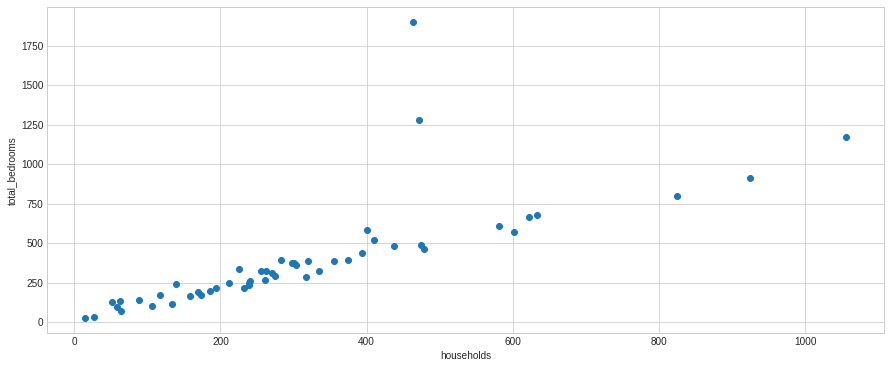

In [19]:
plt.figure(figsize=(15, 6))

plt.xlabel('households')
plt.ylabel('total_bedrooms')

plt.scatter(x1, x2)
plt.show()

่Distribution of variables

#distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


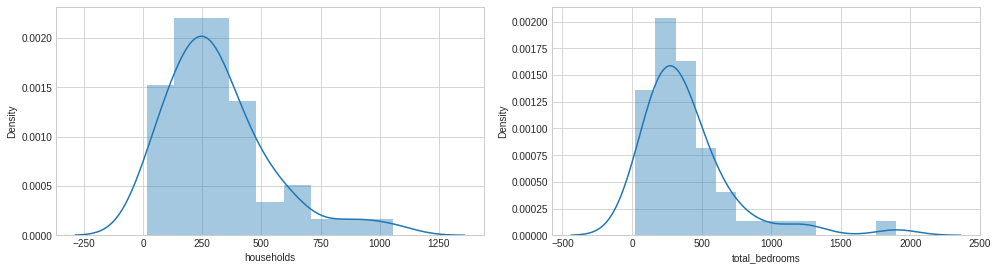

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

plt.tight_layout(pad=5)
sns .distplot(x1, ax=ax[0])

plt.tight_layout(pad=5)
sns .distplot(x2, ax=ax[1])

#histplot

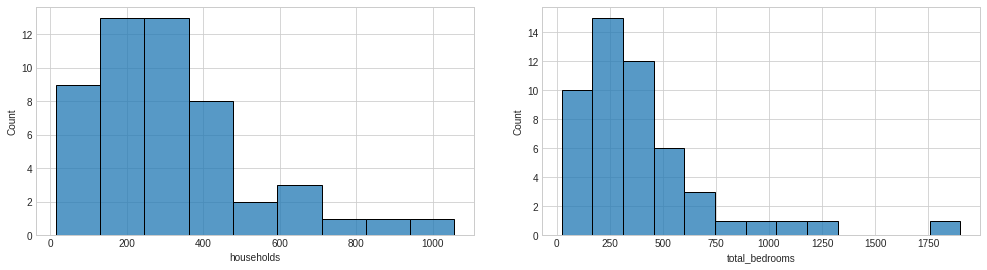

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

plt.tight_layout(pad=5)
sns .histplot(x1, ax=ax[0])

plt.tight_layout(pad=5)
sns .histplot(x2, ax=ax[1])

Linear Regression with Gradient Descent

#scikit-learn
https://scikit-learn.org/ Machine Learning in Python
  
Simple and efficient tools for predictive data analysis
Accessible to everybody, and reusable in various contexts
Built on NumPy, SciPy, and matplotlib
Open source, commercially usable - BSD license

- fit(X, y[, sample_weight]) Fit linear model.
- predict(X) Predict using the linear model.

#ทดสอบการใช้ข้อมูล households พยากรณ์  total_bedrooms

- x1 = dffull.loc[0:50,'households']
- x2 = dffull.loc[0:50,'total_bedrooms']

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



#Train

In [23]:
regr = LinearRegression()

X = x1.values.reshape(-1, 1)
Y = x2.values.reshape(-1, 1)

# Train the model
result = regr.fit(X, Y)

In [24]:
print(regr.intercept_, regr.coef_)

[35.34350914] [[1.13879118]]


#Use Statmodels

In [25]:
import statsmodels.api as sm
from termcolor import colored as cl

slr_model = sm.OLS(Y, X) # Ordinary Least Squares 
slr_reg = slr_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
slr_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.810
Method:                 Least Squares   F-statistic:                              218.8
Date:                Fri, 23 Apr 2021   Prob (F-statistic):                    6.76e-20
Time:                        16:12:39   Log-Likelihood:                         -348.20
No. Observations:                  51   AIC:                                      698.4
Df Residuals:                      50   BIC:                                      700.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2142      0.082     14.793      0.000       1.049       1.379
==============================================================================
Omnibus:                       85.708   Durbin-Watson:                   0.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1364.202
Skew:                           4.673   Prob(JB):                    5.85e-297
Kurtosis:                      26.551   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#สมมติข้อมูล เพื่อทดสอบ


In [27]:
x2t = dffull.loc[51:70,'households']  # สมมติว่ารู้
y2t = dffull.loc[51:70,'total_bedrooms']  # สมมติว่าไม่รู้

X_test = x2t.values.reshape(-1, 1)
Y_test = y2t.values.reshape(-1, 1)

In [28]:
# Make predictions 
y_pred = regr.predict(X_test)

#ผลการพยากรณ์ y_pred

In [29]:
y_pred

array([[323.45767704],
       [298.40427114],
       [428.22646537],
       [491.99877131],
       [419.11613595],
       [414.56097124],
       [329.15163293],
       [711.78546856],
       [151.50020925],
       [678.76052441],
       [397.47910358],
       [616.12700965],
       [413.42218006],
       [477.194486  ],
       [324.59646822],
       [469.22294776],
       [525.02371545],
       [464.66778305],
       [445.30833303],
       [573.99173608]])

#ค่าความเป็นจริง Y_test

In [30]:
Y_test

array([[283.],
       [262.],
       [382.],
       [366.],
       [387.],
       [337.],
       [275.],
       [581.],
       [199.],
       [634.],
       [340.],
       [545.],
       [325.],
       [373.],
       [268.],
       [395.],
       [454.],
       [403.],
       [365.],
       [530.]])

In [31]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error

Coefficients: 
 [[1.13879118]]


In [32]:
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction

Mean squared error: 5265.04


In [33]:

print('Coefficient of determination: %.2f'
      % r2_score(Y_test, y_pred))


Coefficient of determination: 0.57


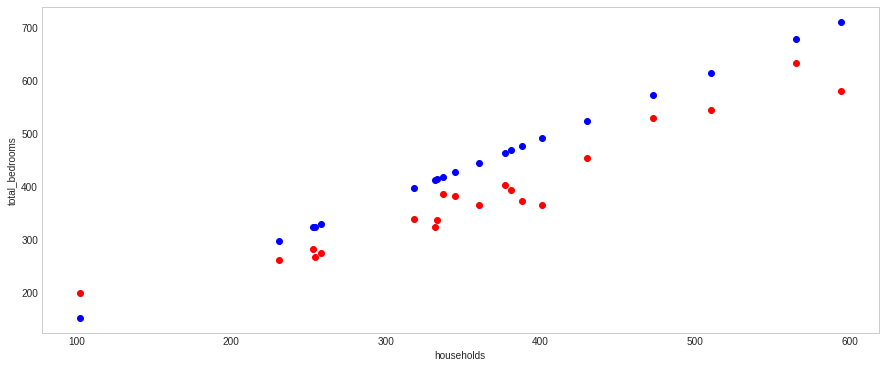

In [34]:
# Plot outputs

#fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 700, 20))
ax.set_yticks(np.arange(0, 800., 20))

plt.figure(figsize=(15, 6))
plt.xlabel('households')
plt.ylabel('total_bedrooms')
plt.scatter(X_test, Y_test,  color='red')
plt.scatter(X_test, y_pred, color='blue')

plt.grid()
plt.show()

#หลักการทำงาน

In [35]:
Image(url='https://miro.medium.com/max/770/1*CjTBNFUEI_IokEOXJ00zKw.gif')


#แสดงเส้นตรง Model

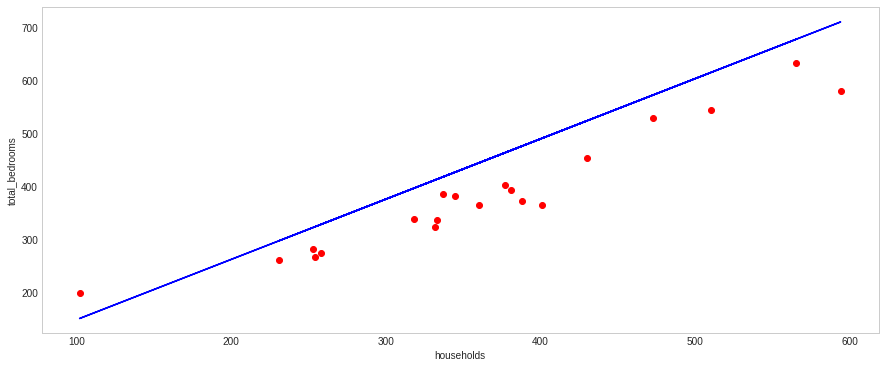

In [36]:
# Plot outputs
plt.figure(figsize=(15, 6))
plt.xlabel('households')
plt.ylabel('total_bedrooms')
plt.scatter(X_test, Y_test,  color='red')
plt.plot(X_test, y_pred, color='blue')

plt.grid()
plt.show()

#แสดงข้อมูลจริง

In [37]:
#tab['xtest']  = pd.DataFrame(x2t.values)
tab = pd.DataFrame(x2t.values, columns = ['xtest'])
#tab['xtest'] = x2t.values
tab['ytrue'] = y2t.values
tab['ypred'] =y_pred


In [38]:
tab

,xtest,ytrue,ypred
0,253.0,283.0,323.457677
1,231.0,262.0,298.404271
2,345.0,382.0,428.226465
3,401.0,366.0,491.998771
4,337.0,387.0,419.116136
5,333.0,337.0,414.560971
6,258.0,275.0,329.151633
7,594.0,581.0,711.785469
8,102.0,199.0,151.500209
9,565.0,634.0,678.760524


#เปรียบเทียบข้อมูลจริง และผลพยากรณ์

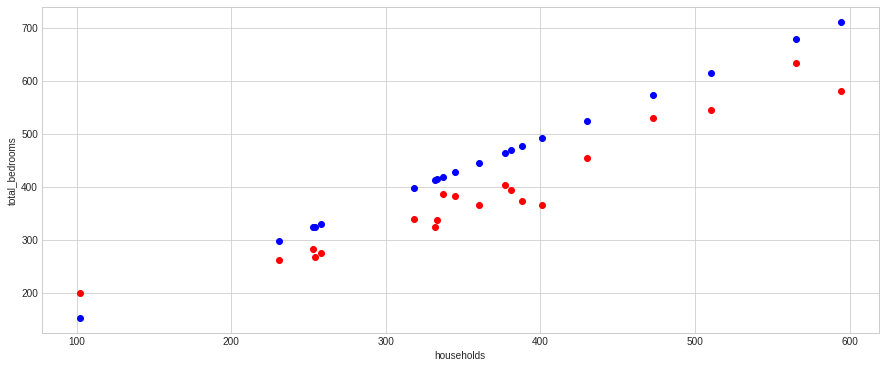

In [39]:
# Plot outputs
plt.figure(figsize=(15, 6))
plt.xlabel('households')
plt.ylabel('total_bedrooms')
plt.scatter(X_test, Y_test,  color='red')
plt.scatter(X_test, y_pred, color='blue')

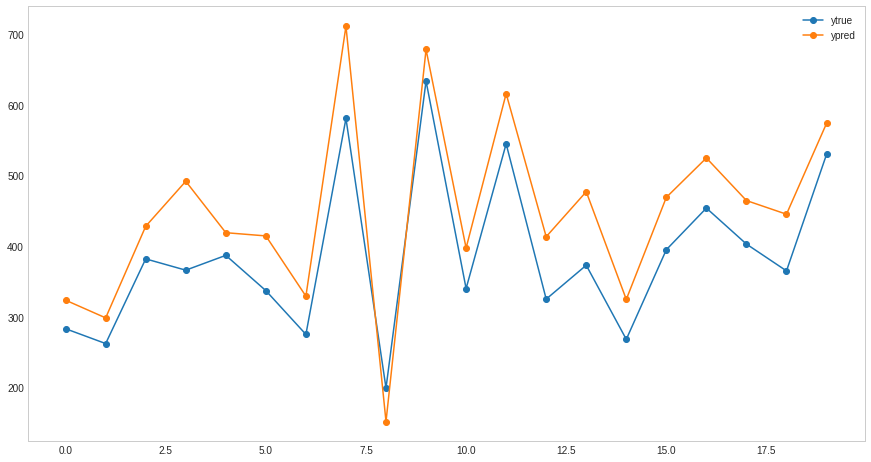

In [40]:
tab[['ytrue','ypred']].plot(figsize=(15,8), marker='o')
plt.grid()
plt.show()

#เข้าใจการทำงาน เส้นตรง Model มาได้อย่างไร

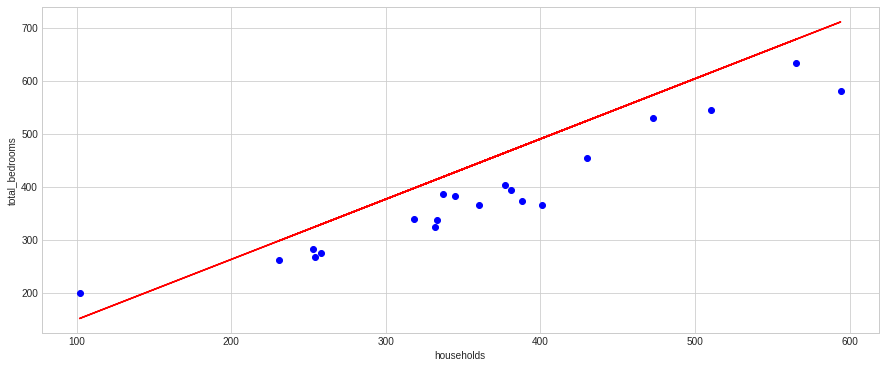

In [41]:
# Plot outputs
plt.figure(figsize=(15, 6))
plt.xlabel('households')
plt.ylabel('total_bedrooms')
plt.scatter(X_test, Y_test,  color='blue')
plt.plot(X_test, y_pred, color='red')

#เบื้องหลังการทำงาน คำสั่ง fit

# เพื่อหาสมการเส้นตรง ที่ให้ค่าผลมรวม error น้อยที่สุด
- Loss Function
- The Gradient Descent Algorithm

# Train the model
regr.fit(X, Y)

In [42]:
Image(url='https://miro.medium.com/max/770/1*CjTBNFUEI_IokEOXJ00zKw.gif')

In [43]:
Image(url='https://sebastianraschka.com/images/faq/closed-form-vs-gd/simple_regression.png')

# รู้จักกับ
- Intercept
- Slop
- Error

In [44]:
Image(url='http://4.bp.blogspot.com/-Jn5ZiWp_d7Q/VmH0SMSJCuI/AAAAAAAAB6w/-6hzNCxv9Ow/s1600/gradient-descent-for-linear-regression.jpeg')

# รูปด้านบน   เส้นตรงสีน้ำเงิน เขียนเป็นสมการได้    y = -51 + 2x

In [45]:
Image(url='https://miro.medium.com/max/1000/1*AsfV2NelG1Ta5F-0kr727w.gif')

In [46]:
Image(url='https://www.andreaperlato.com/img/gradientregression.png')

การปรับ หรือขยับเส้นตรง 

In [47]:
Image(url='https://miro.medium.com/max/489/1*9miKAj6_DYR1jrhmdn9TzA.png')


เพื่อหาสมการเส้นตรง  ที่ให้ค่าผลรวม error น้อย หรือ ใกล้ค่า 0 (ศูนย์) มากที่สุด

In [48]:
Image(url='https://www.andreaperlato.com/img/gradientderivate.png')

#Global minimum and local minimum

In [49]:
Image(url='https://miro.medium.com/max/491/1*ka5Eq5hMVaR8v8mIekqOOQ.png')

In [50]:
Image(url='https://miro.medium.com/max/699/1*FVjzT69K4YSXHDZBdjVZxg.png')

In [51]:
Image(url='https://miro.medium.com/max/770/1*47skUygd3tWf3yB9A10QHg.gif')

#Gradient Descent Algorithm
Gradient descent เป็นแก่นของการแก้เพื่อหาค่าที่เหมาะสมที่สุดให้กับฟังค์ชั่นหรือ Cost function หนึ่งๆ โดยการวนหาค่าที่ทำให้ cost (ในหนังสือส่วนมากมักเรียกว่า J) ต่ำสุด จากการคำนวณ slope ณ จุดที่เราอยู่

# Lab

ให้ใช้แนวโปรแกรมข้างต้น
- ใช้ข้อมูล 500 แถวแรก สำหรับการ เรียนรู้
- ให้พยากรณ์ข้อมูล แถวที่ 601 - 700
- ให้แสดงค่า error